In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Elevate Labs/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Categorical features
categorical_features = df.select_dtypes(include=['object']).columns.tolist()
print("Categorical Features:", categorical_features)

# Numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print("\nNumerical Features:", numerical_features)

Categorical Features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

Numerical Features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


**Handle Missing Values**

In [5]:
# Fill 'Age' with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill 'Embarked' with mode
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' (too many missing values)
df.drop('Cabin', axis=1, inplace=True)

<ipython-input-5-928ad547db7f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-5-928ad547db7f>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Encode Categorical Features**

In [7]:
# Encode 'Sex' column
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One-hot encode 'Embarked'
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


**Normalize Numerical Features**

In [9]:
from sklearn.preprocessing import StandardScaler

# Create a scaler
scaler = StandardScaler()

# Choose numerical columns to scale
num_cols = ['Age', 'Fare', 'SibSp', 'Parch']

# Apply scaling
df[num_cols] = scaler.fit_transform(df[num_cols])

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,0.432793,-0.473674,A/5 21171,-0.502445,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0.663861,0.432793,-0.473674,PC 17599,0.786845,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,-0.488854,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,0.432793,-0.473674,113803,0.420730,False,True
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,-0.474545,-0.473674,373450,-0.486337,False,True


**Visualize and Remove Outliers**

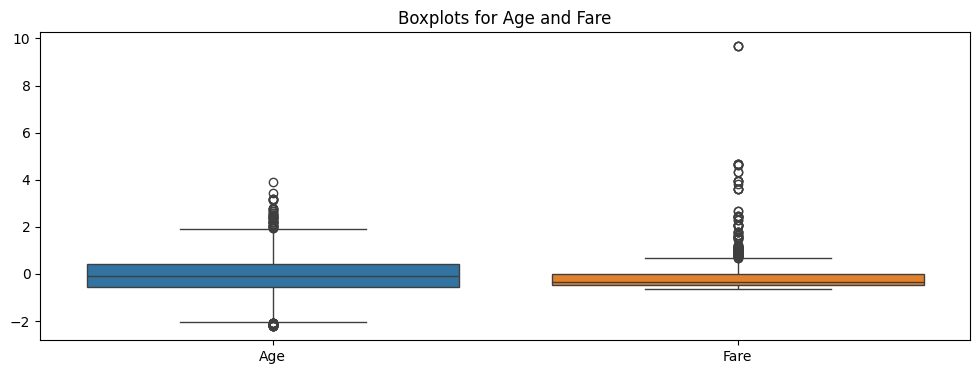

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplots for outlier detection
plt.figure(figsize=(12, 4))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplots for Age and Fare")
plt.show()

In [12]:
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]

df = remove_outliers(df, 'Age')
df = remove_outliers(df, 'Fare')

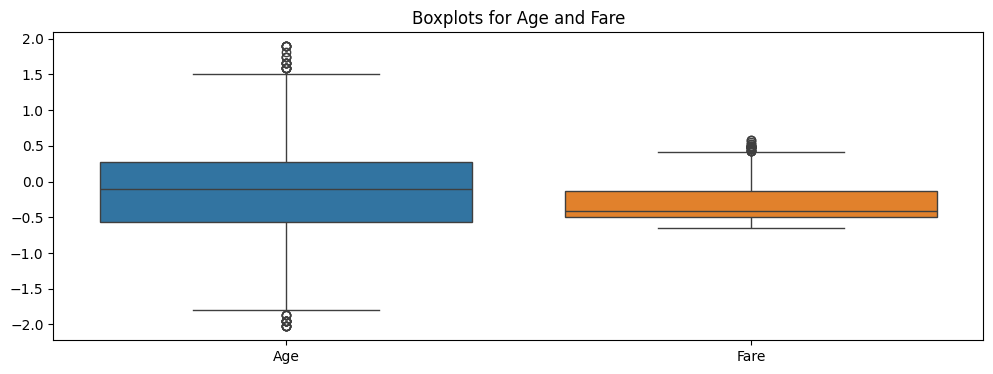

In [13]:
plt.figure(figsize=(12, 4))
sns.boxplot(data=df[['Age', 'Fare']])
plt.title("Boxplots for Age and Fare")
plt.show()

**Drop Unnecessary Columns**

In [14]:
# Drop 'Name', 'Ticket', 'PassengerId' if not useful for modeling
df.drop(['Name', 'Ticket', 'PassengerId'], axis=1, inplace=True)

In [15]:
print("Final dataset shape:", df.shape)
df.head()

Final dataset shape: (718, 9)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,0,-0.565736,0.432793,-0.473674,-0.502445,False,True
2,1,3,1,-0.258337,-0.474545,-0.473674,-0.488854,False,True
3,1,1,1,0.433312,0.432793,-0.473674,0.420730,False,True
4,0,3,0,0.433312,-0.474545,-0.473674,-0.486337,False,True
5,0,3,0,-0.104637,-0.474545,-0.473674,-0.478116,True,False
